# Importing the libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown


Downloading data file from google drive

In [ ]:
file_url = 'https://drive.google.com/file/d/1LQ2Wjs6GZeawYDJIean-j-bV4guKgwz-/view?usp=sharing'
gdown.download(file_url, fuzzy= True)

Downloading...
From: https://drive.google.com/uc?id=1LQ2Wjs6GZeawYDJIean-j-bV4guKgwz-
To: /content/diabetes.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 24.1MB/s]


'diabetes.csv'

# Description of all the columns

1. Pregnancies : Number of times pregnant
2. Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure : Diastolic blood pressure (mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
5. Insulin : 2-Hour serum insulin (mu U/ml)
6. BMI : Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function
8. Age : Age (years)
9. Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0 . 
0 means patient don't have diabetes and 1 means patient have diabetes


loading csv as dataframe

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* There are no missing data and the data type of the columns are mostly integer except BMI and DiabetesPedigreeFunction  

In [ ]:
data.shape

(768, 9)

There are 768 rows and 9 columns in the data

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Verifying that there are no missing values in data

In [ ]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* Outcome is our target column
* 0 means there is no diabetes in the patient and 1 means the patient have diabetes


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Listing all the columns of data

# Outlier Detection and Handeling

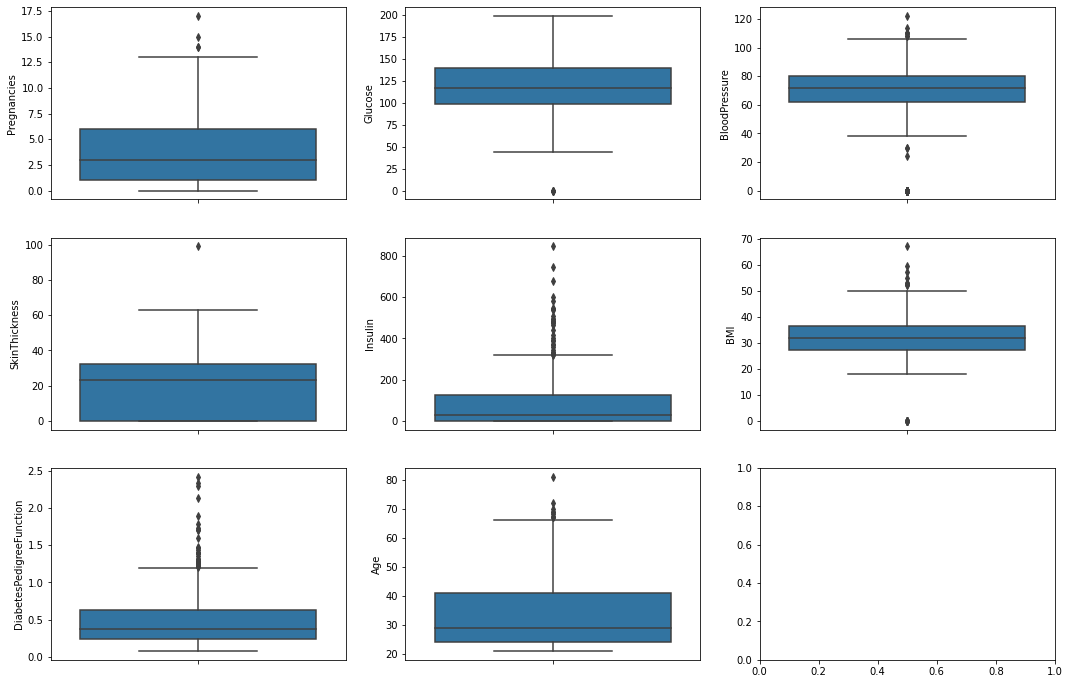

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(18,12))
plt1 = sns.boxplot(data = data, y = 'Pregnancies', ax = axs[0,0])
plt2 = sns.boxplot(data = data, y = 'Glucose', ax = axs[0,1])
plt3 = sns.boxplot(data = data, y = 'BloodPressure', ax = axs[0,2])
plt4 = sns.boxplot(data = data, y = 'SkinThickness', ax = axs[1,0])
plt5 = sns.boxplot(data = data, y = 'Insulin', ax = axs[1,1])
plt6 = sns.boxplot(data = data, y = 'BMI', ax = axs[1,2])
plt7 = sns.boxplot(data = data, y = 'DiabetesPedigreeFunction', ax = axs[2,0])
plt8 = sns.boxplot(data = data, y = 'Age', ax = axs[2,1])
plt.show()

* There are very few outliners in 'Skin Thickness' and 'Gulcose' column but there is high concentration of outliers over the bounds of upper whisker in 'Insulin' and 'DiabetesPedigreeFunction'

## Function to detect outliers

In [ ]:
def outlier_detection(data,columns):
  outliers = [] # list which will hold the outliers
  outliers_dict = {}
  outliers_count = 0

  for i in columns:
    q1, q3= np.percentile(data[i], [25,75]) # find mean of a particular column
    iqr = q3-q1

    lower_whisker = q1-1.5*iqr # lower bound of data
    upper_whisker = q3+1.5*iqr # upper bound of data

    # data outside of lower or upper whisker are considered as outliers

    print(f''' 
        column : {i}
        lower_whisker : {lower_whisker}
        upper_whisker :{upper_whisker}''')
    
    for x in data[i]:
      if (x < lower_whisker or x > upper_whisker):
        outliers.append(x) # adding outlies as list
        outliers_count += 1 # increasing the outliers count by 1 each time a new outlier is found
    
    print(f'''
        Total outliers : {len(outliers)}
        Outliers : {outliers}
        ''')
    
    outliers_dict.update({i:outliers_count}) # updating outliers dictionary with column as key and total outliers as its value
    outliers.clear() # clearing the outliers list
    outliers_count = 0 # resetting outliers count to 0 so that during next loop count starts from 0
  return outliers_dict

In [ ]:
a = outlier_detection(data,data.drop(columns = ['Outcome'])) # detecting outliners of all columns except outcome

 
        column : Pregnancies
        lower_whisker : -6.5
        upper_whisker :13.5

        Total outliers : 4
        Outliers : [15, 17, 14, 14]
        
 
        column : Glucose
        lower_whisker : 37.125
        upper_whisker :202.125

        Total outliers : 5
        Outliers : [0, 0, 0, 0, 0]
        
 
        column : BloodPressure
        lower_whisker : 35.0
        upper_whisker :107.0

        Total outliers : 45
        Outliers : [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]
        
 
        column : SkinThickness
        lower_whisker : -48.0
        upper_whisker :80.0

        Total outliers : 1
        Outliers : [99]
        
 
        column : Insulin
        lower_whisker : -190.875
        upper_whisker :318.125

        Total outliers : 34
        Outliers : [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 

* Some of the outliers here have irrelevant datas.
* we will remove these irrelevand datas from our dataframe for more accurate prediction.

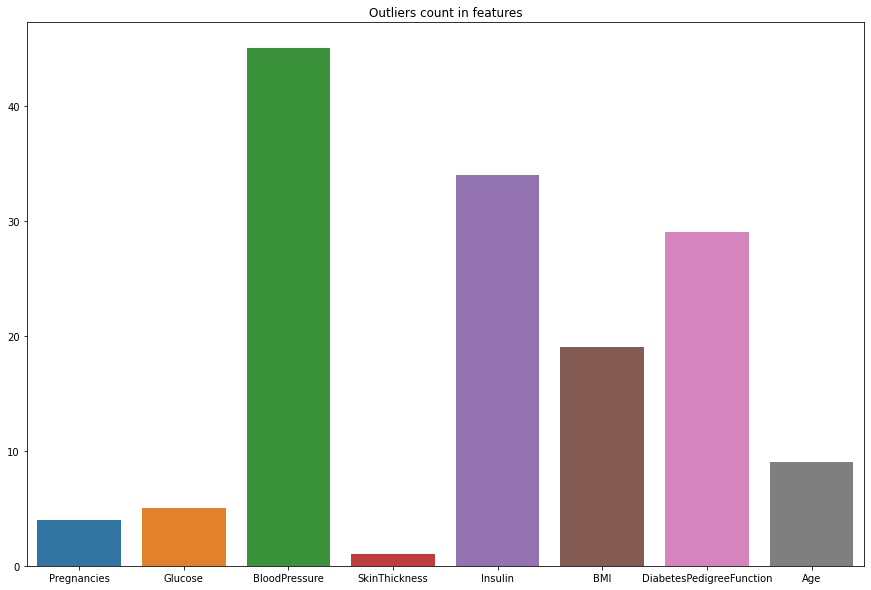

In [ ]:
df = pd.DataFrame() # creating a dataframe
df = df.append(a, ignore_index=True) # appending dataframe with the outliner dictionary
plt.figure( figsize = (15,10)) # defining the size of plot
sns.barplot(data=df) # using seaborn barplot and dataframe as its data
plt.title('Outliers count in features')
plt.show()

Numbers of outliers in each column

In [ ]:
data[data['Pregnancies']>13] # getting rows having pregnancies greater than 13

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [ ]:
data[data['Pregnancies']>13] = np.nan # making all the values of above rows as NaN so that we can remove them

In [ ]:
data[data['Pregnancies']>13] # results after changing the values to NaN


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.isna().sum()

Pregnancies                 4
Glucose                     4
BloodPressure               4
SkinThickness               4
Insulin                     4
BMI                         4
DiabetesPedigreeFunction    4
Age                         4
Outcome                     4
dtype: int64

on changing the values to NaN we got missing values on all columns we will remove them

In [ ]:
data[data['Glucose']<1] = np.nan # making the values of rows having glucose less than 1 as NaN
data[data['BloodPressure']<40] = np.nan # making the values of rows having BloodPressure less than 40 as NaN
data[data['BMI']<1] = np.nan #making the values of rows having BMI less than 1 as NaN

In [ ]:
data.isna().sum() # checking total missing datas

Pregnancies                 52
Glucose                     52
BloodPressure               52
SkinThickness               52
Insulin                     52
BMI                         52
DiabetesPedigreeFunction    52
Age                         52
Outcome                     52
dtype: int64

In [ ]:
data.dropna(axis = 0, how = 'all', inplace = True) # removing all the rows having NaN value

In [ ]:
data.isna().sum() # rechecking if there still missing datas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape # shape of dataframe after removing outliers

(716, 9)

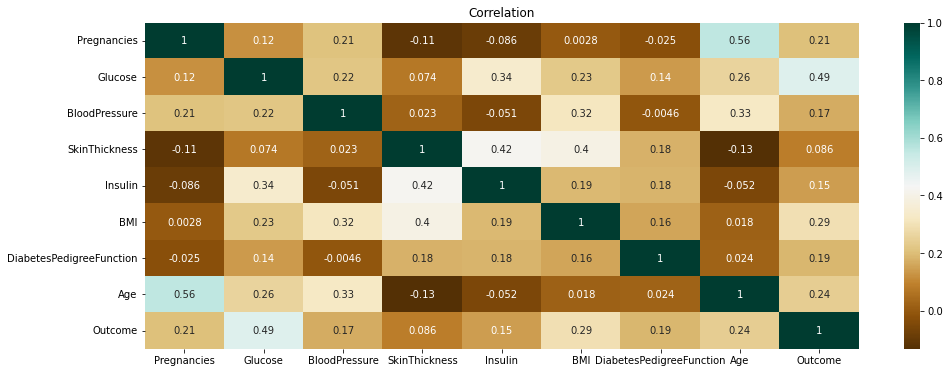

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot= True, cmap='BrBG')
plt.title('Correlation')
plt.show()

all the data have weak positive correlation with the target except glucose which have strong correlation of 0.49.

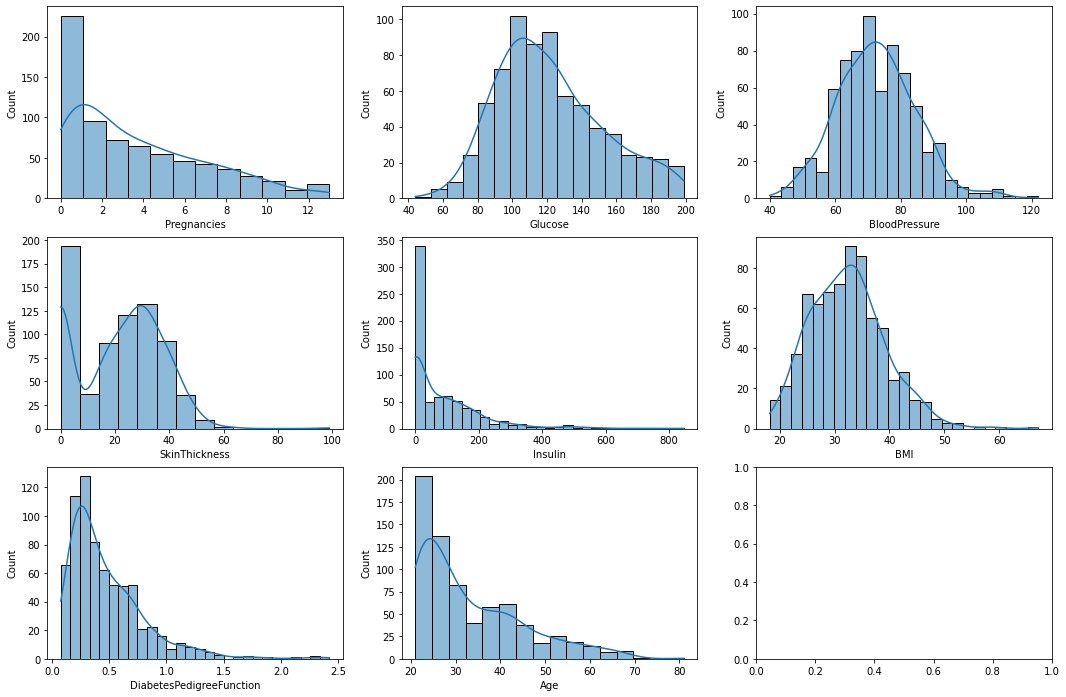

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(18,12))
plt1 = sns.histplot(data = data, x = 'Pregnancies', ax = axs[0,0], kde=True)
plt2 = sns.histplot(data = data, x = 'Glucose', ax = axs[0,1], kde=True)
plt3 = sns.histplot(data = data, x = 'BloodPressure', ax = axs[0,2], kde=True)
plt4 = sns.histplot(data = data, x = 'SkinThickness', ax = axs[1,0], kde=True)
plt5 = sns.histplot(data = data, x = 'Insulin', ax = axs[1,1], kde=True)
plt6 = sns.histplot(data = data, x = 'BMI', ax = axs[1,2], kde=True)
plt7 = sns.histplot(data = data, x = 'DiabetesPedigreeFunction', ax = axs[2,0], kde=True)
plt8 = sns.histplot(data = data, x = 'Age', ax = axs[2,1], kde=True)
plt.show()

* Most of the features are not uniformly distributed and from the graph we can see they tend to be more positively skewed.

## Checking skewness of various features

In [ ]:
from scipy.stats import skew

In [ ]:
skew(data.Pregnancies)

0.8110698777068402

In [ ]:
skew(data.Glucose)

0.5245298365984564

In [ ]:
skew(data.BloodPressure)

0.33736721989765817

In [ ]:
skew(data.SkinThickness)

0.06201585014684023

In [ ]:
skew(data.Insulin)

2.193853439882973

In [ ]:
skew(data.BMI)

0.5845180586246096

In [ ]:
skew(data.DiabetesPedigreeFunction) 

1.9153661932119403

In [ ]:
skew(data.Age)

1.0942733693735411

* we can see that pregnancies,insulin, age and diabetespedigreefunction are heavily skewed towards right side.

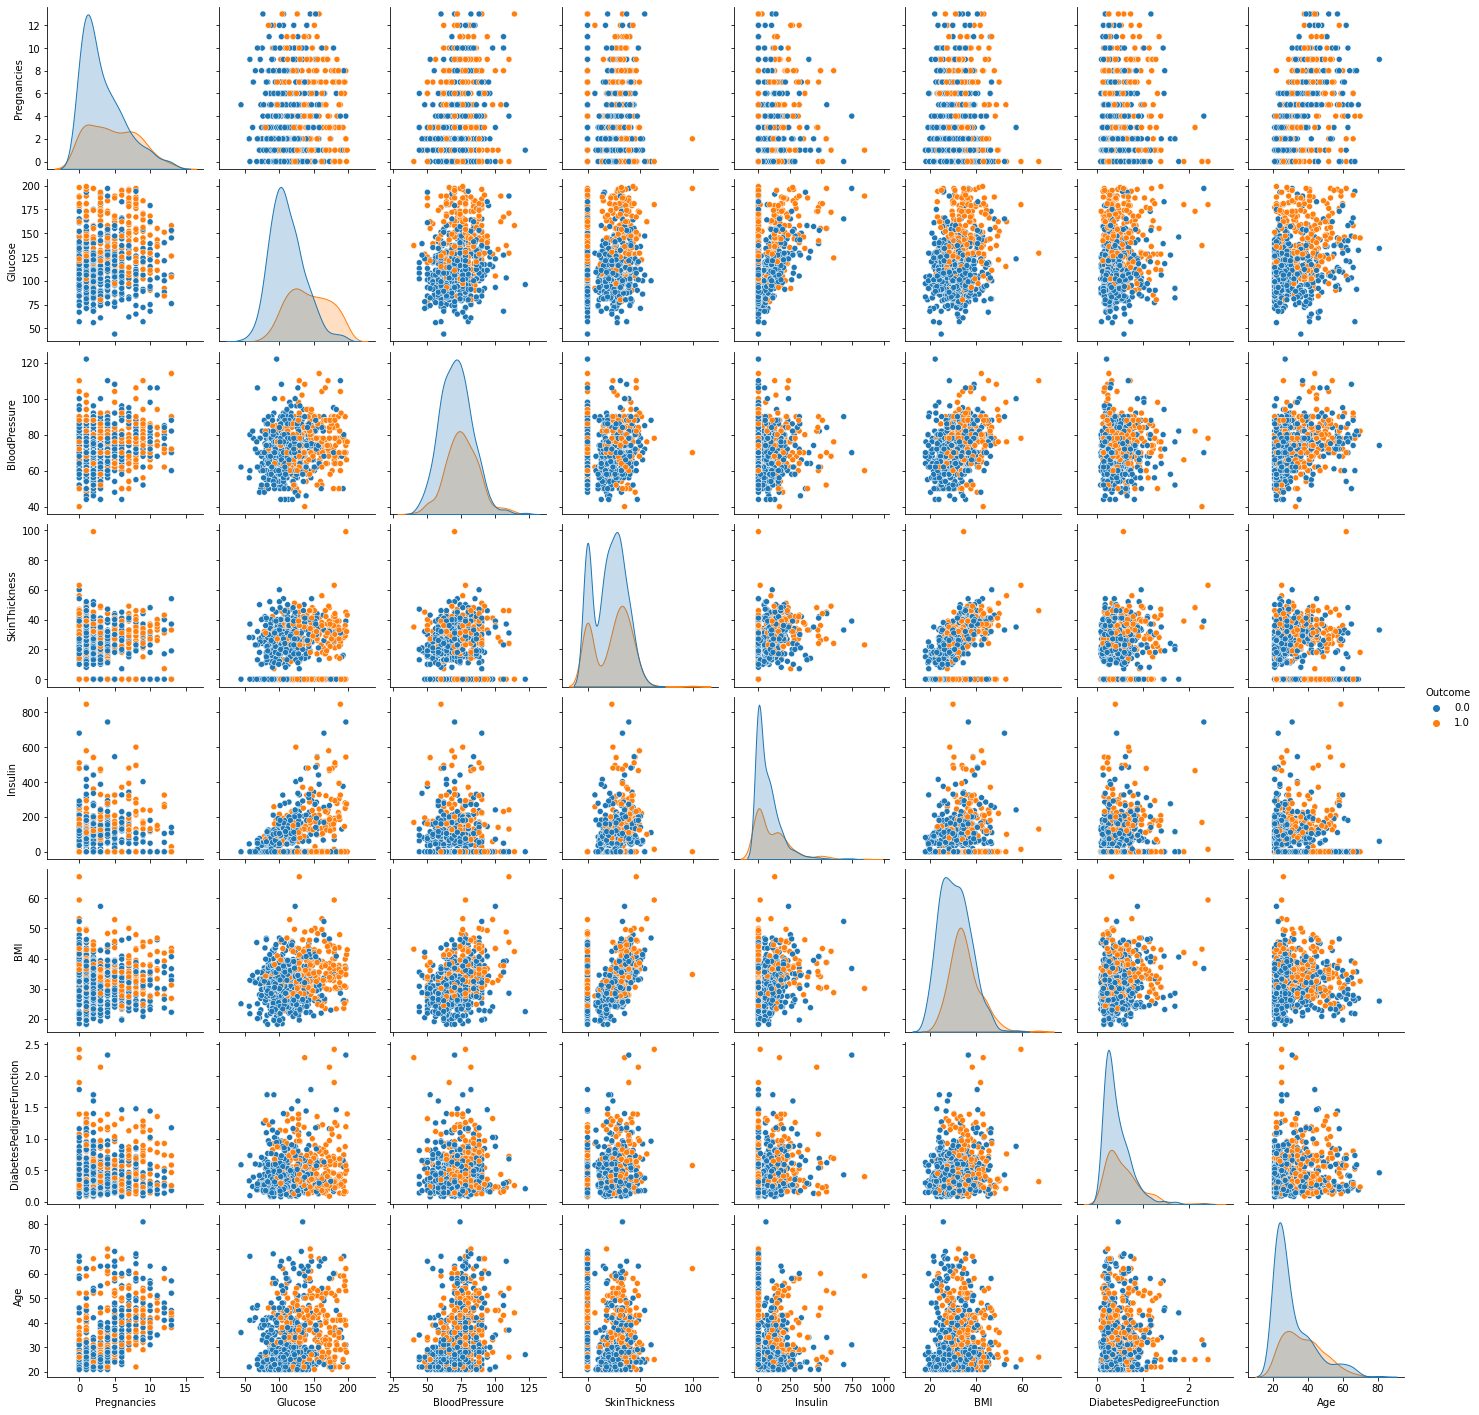

In [ ]:
sns.pairplot(data=data, hue = 'Outcome')

* Glucose seems to be the most important factor to determine if person have diabetes or not cause from the graph we see that chances of diabetes on people having less Glucose is very less.


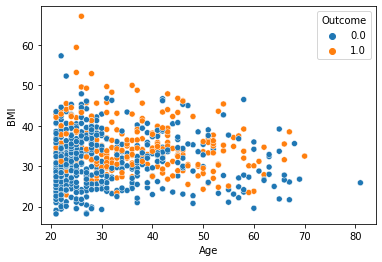

In [ ]:
sns.scatterplot(data = data, x ='Age', y='', hue = 'Outcome')

People having less BMI at any age have less chance of having diabetes

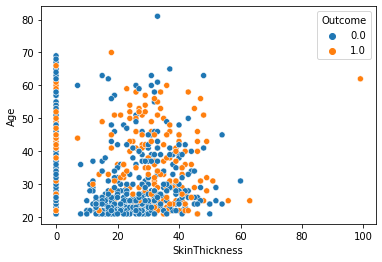

In [ ]:
sns.scatterplot(data = data, x ='SkinThickness', y='Age', hue = 'Outcome')

People with low skin thickness at lower age seems to be safe from diabetes.


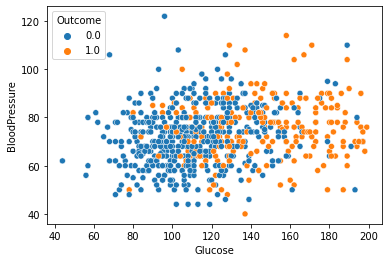

In [ ]:
sns.scatterplot(data = data, x ='Glucose', y='BloodPressure', hue = 'Outcome')

Even if a person have low blood pressure they may get diabetes if their glucose level is high

# Training and testing the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] # features
y = data['Outcome'] # target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 50) # splitting test and train data

In [ ]:
x_train.shape

(572, 8)

In [ ]:
x_test.shape

(144, 8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81        98
         1.0       0.60      0.72      0.65        46

    accuracy                           0.76       144
   macro avg       0.73      0.75      0.73       144
weighted avg       0.77      0.76      0.76       144

[[76 22]
 [13 33]]


* The accuracy of the model is 76%.
* Since the data is imbalanced(not normally distributed), we will use f1-score to determine the effectiveness of the model.
* We see the model predicted 81% of people who didn't had diabetes correctly while only 65% of the prediction were correct for the people that had diabetes.

## Selecting best features to improve the model using chi square test and SelectKBest

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
best = SelectKBest(chi2, k =5) # selecting 5 best feature to use in model using chi square test
best.fit(X,y)
new_best = best.transform(X) # transforming value of X as new best values to fit on model
new_best[0]

array([  6. , 148. ,   0. ,  33.6,  50. ])

* The array contains value of best features in index 0.

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


From the dataframe we see the value matches with pregnancies, glucose, insulin,BMI and Age.

In [ ]:
X = data[['Pregnancies','Glucose','Insulin','BMI','Age']] # using only the best features for new model
y = data['Outcome']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 50)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        89
         1.0       0.75      0.60      0.67        55

    accuracy                           0.77       144
   macro avg       0.77      0.74      0.75       144
weighted avg       0.77      0.77      0.76       144

[[78 11]
 [22 33]]


* The accuracy improved slightly by 1% .
* Same goes for f1-score which improved 2%.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 50)
model = RandomForestClassifier(max_depth= 5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        89
         1.0       0.88      0.64      0.74        55

    accuracy                           0.83       144
   macro avg       0.84      0.79      0.80       144
weighted avg       0.83      0.83      0.82       144

[[84  5]
 [20 35]]


* on changing algorithm to random forest with max depth of 5 the accuracy increased significantly to 83%.
* The model also correctly predicted 87 % of patients that didn't had diabetes and 74% patients that had diabetes.